<a href="https://colab.research.google.com/github/sijuswamy/Algorithmic-Thinking-FDP/blob/main/Matplotlib_for_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualization with Matplotlib
We'll now take an in-depth look at the Matplotlib package for visualization in Python.
Matplotlib is a multi-platform data visualization library built on NumPy arrays, and designed to work with the broader SciPy stack.
It was conceived by John Hunter in 2002, originally as a patch to IPython for enabling interactive MATLAB-style plotting via gnuplot from the IPython command line.
IPython's creator, **Fernando Perez**, was at the time scrambling to finish his PhD, and let John know he wouldn’t have time to review the patch for several months.

John took this as a cue to set out on his own, and the Matplotlib package was born, with version 0.1 released in 2003.
It received an early boost when it was adopted as the plotting package of choice of the Space Telescope Science Institute (the folks behind the Hubble Telescope), which financially supported Matplotlib’s development and greatly expanded its capabilities.

- One of `Matplotlib`’s most important features is its ability to play well with many operating systems and graphics backends.

- `Matplotlib` supports dozens of backends and output types, which means you can count on it to work regardless of which operating system you are using or which output format you wish.

- This cross-platform, everything-to-everyone approach has been one of the great strengths of `Matplotlib`.

- It has led to a large user base, which in turn has led to an active developer base and `Matplotlib`’s powerful tools and ubiquity within the scientific Python world.




## Step 1: Importing Matplotlib

Just as we use the ``np`` shorthand for NumPy and the ``pd`` shorthand for Pandas, we will use some standard shorthands for Matplotlib imports:

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
%matplotlib inline

The ``plt`` interface is what we will use most often, as we shall see throughout this chapter.

### Setting Styles

We will use the ``plt.style`` directive to choose appropriate aesthetic styles for our figures.
Here we will set the ``classic`` style, which ensures that the plots we create use the classic `Matplotlib` style:

In [ ]:
#plt.style.use('classic')
#plt.style.use('default')
plt.style.use('seaborn')

Throughout this section, we will adjust this style as needed.
Note that the stylesheets used here are supported as of Matplotlib version 1.5; if you are using an earlier version of Matplotlib, only the default style is available.
For more information on stylesheets, see [Customizing Matplotlib: Configurations and Style Sheets](04.11-Settings-and-Stylesheets.ipynb).

### ``show()`` or No ``show()``? How to Display Your Plots
A visualization you can't see won't be of much use, but just how you view your Matplotlib plots depends on the context.
The best use of Matplotlib differs depending on how you are using it; roughly, the three applicable contexts are using Matplotlib in a script, in an IPython terminal, or in an IPython notebook.

Plotting from a script
If you are using Matplotlib from within a script, the function plt.show() is your friend. plt.show() starts an event loop, looks for all currently active figure objects, and opens one or more interactive windows that display your figure or figures.

So, for example, you may have a file called myplot.py containing the following:

# ------- file: myplot.py ------
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 100)

plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

plt.show()

You can then run this script from the command-line prompt, which will result in a window opening with your figure displayed:

```
$ python myplot.py
```

The ``plt.show()`` command does a lot under the hood, as it must interact with your system's interactive graphical backend.
The details of this operation can vary greatly from system to system and even installation to installation, but matplotlib does its best to hide all these details from you.

One thing to be aware of: the ``plt.show()`` command should be used *only once* per Python session, and is most often seen at the very end of the script.
Multiple ``show()`` commands can lead to unpredictable backend-dependent behavior, and should mostly be avoided.

## First programe in `matplotlib`

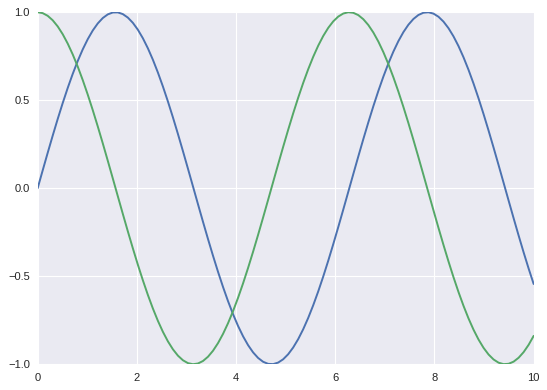

In [ ]:
import numpy as np
x = np.linspace(0, 10, 100)
plt.style.use('seaborn')
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))
plt.show()

In the IPython notebook, you also have the option of embedding graphics directly in the notebook, with two possible options:

- ``%matplotlib notebook`` will lead to *interactive* plots embedded within the notebook
- ``%matplotlib inline`` will lead to *static* images of your plot embedded in the notebook

For this notebook, we will generally opt for ``%matplotlib inline``:

In [ ]:
%matplotlib inline

After running this command (it needs to be done only once per kernel/session), any cell within the notebook that creates a plot will embed a PNG image of the resulting graphic:

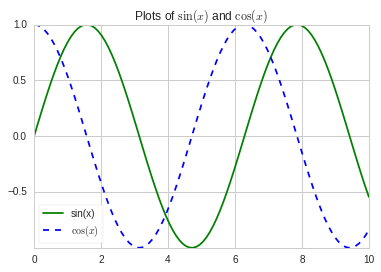

In [ ]:
import numpy as np
plt.style.use('seaborn-whitegrid')
fig=plt.figure()
x = np.linspace(0, 10, 100)
plt.plot(x, np.sin(x), 'g-', label='sin(x)') # r stands for colour and r in label stands for row text
plt.plot(x, np.cos(x), 'b--', label=r'$\cos(x)$')
plt.title('Plots of $\sin(x)$ and $\cos(x)$' )
plt.axis('tight')
plt.legend(frameon=True, loc='lower left', ncol=1,framealpha=0.9)
plt.show()

### Saving Figures to File

One nice feature of Matplotlib is the ability to save figures in a wide variety of formats.
Saving a figure can be done using the ``savefig()`` command.
For example, to save the previous figure as a PNG file, you can run this:

In [ ]:
fig.savefig('my_figure.png')

We now have a file called ``my_figure.png`` in the current working directory:

In [ ]:
!ls -lh my_figure.png

-rw-r--r-- 1 root root 35K Dec 30 03:36 my_figure.png


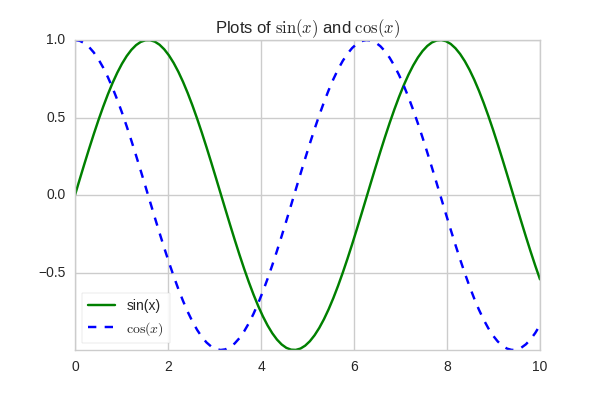

In [ ]:
from IPython.display import Image
Image('my_figure.png')

In ``savefig()``, the file format is inferred from the extension of the given filename.
Depending on what backends you have installed, many different file formats are available.
The list of supported file types can be found for your system by using the following method of the figure canvas object:

In [ ]:
fig.canvas.get_supported_filetypes()

{'ps': 'Postscript',
 'eps': 'Encapsulated Postscript',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

## Two Interfaces for the Price of One

A potentially confusing feature of Matplotlib is its dual interfaces: a convenient MATLAB-style state-based interface, and a more powerful object-oriented interface. We'll quickly highlight the differences between the two here.

#### MATLAB-style Interface

Matplotlib was originally written as a Python alternative for MATLAB users, and much of its syntax reflects that fact.
The MATLAB-style tools are contained in the pyplot (``plt``) interface.
For example, the following code will probably look quite familiar to MATLAB users:

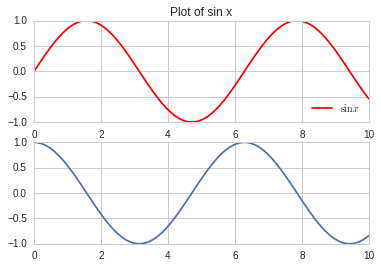

In [ ]:
plt.figure()  # create a plot figure

# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(x, np.sin(x),'r-',label=r'$\sin x$')
plt.legend(loc='lower right')
plt.title("Plot of sin x")

# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));

## Some Useful plots

### Simple Scatter Plots
Another commonly used plot type is the simple scatter plot, a close cousin of the line plot. Instead of points being joined by line segments, here the points are represented individually with a dot, circle, or other shape. We’ll start by setting up the notebook for plotting and importing the functions we will use:

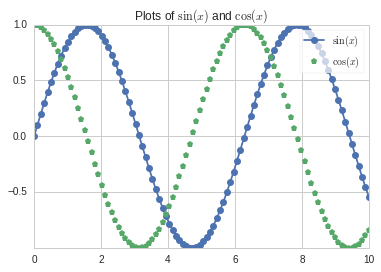

In [ ]:
import numpy as np
x = np.linspace(0, 10, 100)
#fig = plt.figure()
plt.plot(x, np.sin(x), '-o', label=r'$\sin(x)$',)
plt.plot(x, np.cos(x), 'p', label=r'$\cos(x)$')
plt.title('Plots of $\sin(x)$ and $\cos(x)$' )
plt.axis('tight')
plt.legend(frameon=True, loc='upper right', ncol=1,framealpha=.7)
plt.show()

## Scatter Plots with plt.scatter

A second, more powerful method of creating scatter plots is the plt.scatter function, which can be used very similarly to the `plt.plot` function:

>The primary difference of plt.scatter from plt.plot is that it can be used to create scatter plots where the properties of each individual point (size, face color, edge color, etc.) can be individually controlled or mapped to data.

Let's show this by creating a random scatter plot with points of many colors and sizes. In order to better see the overlapping results, we'll also use the alpha keyword to adjust the transparency level:

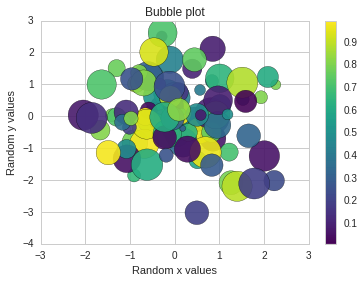

In [ ]:
rng = np.random.RandomState(43)## setting seed to the random number generator
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)
plt.scatter(x, y, c=colors, s=sizes, alpha=0.9,
            cmap='viridis',label=" Random Y values")
plt.xlabel('Random x values')
plt.ylabel('Random y values')
plt.title('Bubble plot' )
plt.colorbar();  # show color scale

# Histograms, Binnings, and Density

A simple histogram can be a great first step in understanding a dataset.

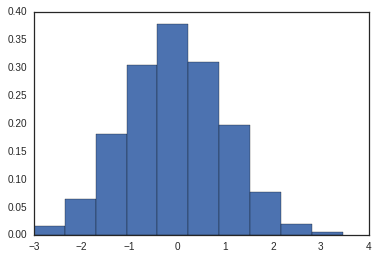

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
data = np.random.randn(1000)
plt.hist(data,density=True);

## Customizing Histograms
The `hist()` function has many options to tune both the calculation and the display; here's an example of a more customized histogram:

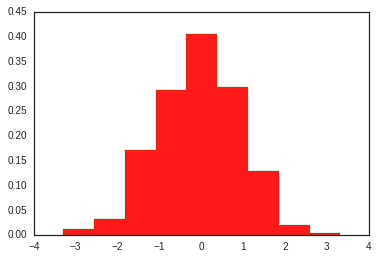

In [ ]:
plt.hist(data, bins=9, alpha=0.9,
         histtype='stepfilled',density=True, color='r',
         edgecolor='g');

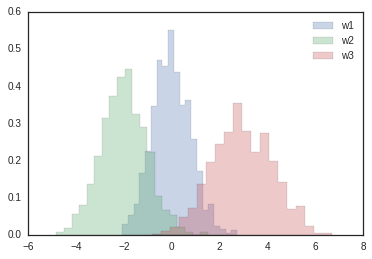

In [ ]:
w1 = np.random.normal(0, 0.8, 1000)
w2 = np.random.normal(-2, 1, 1000)
w3 = np.random.normal(3, 1.2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=20)

plt.hist(w1, **kwargs,label='w1')
plt.hist(w2, **kwargs,label='w2')
plt.hist(w3, **kwargs,label='w3')
plt.legend()
plt.show()